In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GLOBAL_VARIABLES1 import *


def generate_data(n,scale,theta):
    # Normally distributed around the origin
    x = np.random.normal(0,1, n); y = np.random.normal(0,1, n)
    P = np.vstack((x, y)).T
    # Transform
    sx,sy = scale
    S = np.array([[sx,0],[0,sy]])
    c,s = np.cos(theta), np.sin(theta)
    R = np.array([[c,-s],[s,c]]).T #T, due to right multiplication
    return P.dot(S).dot(R)

def synthetic_data():
    N=0
    plt.figure()
    for i in range(N_CLASS):
        scale = SCALE[i]
        theta = THETA[i]
        N+=N_D1
        D1 = generate_data(N_D1,scale,theta) +TRANS[i]
        D1 = np.column_stack((D1,i*np.ones([N_D1,1])))
        if i==0:
            DATA = D1
        else: 
            DATA = np.row_stack((DATA,D1))
        plt.scatter(D1[:,0],D1[:,1],s=15,c=COLOR[i],marker=MARKER[i])

    np.savetxt(DAT_FILENAME,DATA,delimiter=',',fmt=FORMAT)
    print(' saved: %s' %(DAT_FILENAME))

    #xmin,xmax = np.min(DATA[:,0]), np.max(DATA[:,0])
    ymin,ymax = np.min(DATA[:,1]), np.max(DATA[:,1])
    plt.ylim([int(ymin)-1,int(ymax)+1])

    plt.title('Synthetic Data: N = '+str(N))
    myfigsave(FIG_FILENAME)
    
    return DATA
    
    #if __name__ == '__main__':
    #    plt.show(block=False); plt.pause(5)
    #
    #if __name__ == '__main__':
    #    synthetic_data()

 saved: synthetic1.data
 saved: synthetic1-data.png


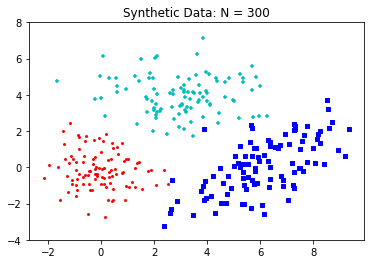

In [2]:
data =synthetic_data()

In [3]:
X = np.array(data[:,0:2])

In [4]:
X.shape

(300, 2)

In [5]:
y = np.array(data[:,2])

In [6]:
y.shape,len(y)

((300,), 300)

In [7]:
def Information_matrix(X):
    N = len(X)
    A=np.column_stack((np.ones([N,]),X))
    return A

In [8]:
def Source_matrix(y):
    N = len(y)
    allclasses = np.unique(y)
    B = np.zeros((N,len(allclasses)))
    for i in range(N):
        class_value = int(y[i])
        B[i][class_value] = 1
    return B

In [55]:
def calculate_W(A,B):
    #W = np.zeros((A.shape[1],B.shape[1]))
    At_A = A.transpose() @ A
    At_B = A.transpose() @ B
    
    W = np.linalg.solve(At_A,At_B)
    
    return W

def calculate_W_by_svd(A,B):
    # Perform SVD of A
    u,s,vh = np.linalg.svd(A)
    
    # Find rank of A
    K = max(A.shape[0], A.shape[1])
    r = 0;
    while( r < A.shape[1] and abs(s[r]) >= abs(K*1e-6*s[0]) ):
        r = r+1;
    
    # Find least square solution
    v = vh.transpose()
    W = np.zeros((A.shape[1], A.shape[1]))
    for i in range(r):
        tmp = ((u[:,i].transpose() @ B)/s[i])
        for j in range(A.shape[1]):
            W[:,j] += tmp[j] * v[:,i] 
    
    return W

In [10]:
A=Information_matrix(X)

In [11]:
B=Source_matrix(y)

In [12]:
A.shape[1],B.shape[1],len(A),A[1]

(3, 3, 300, array([ 1.        , -0.00477005, -0.92248899]))

In [44]:
W = np.zeros((A.shape[1],B.shape[1]))
W

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [56]:
w = calculate_W(A,B)
print(w)
w = calculate_W_by_svd(A,B)
print(w)

[[ 0.7939392   0.06167975  0.14438105]
 [-0.11799901  0.13256622 -0.01456721]
 [-0.08039742 -0.09822287  0.17862029]]
[[ 0.7939392   0.06167975  0.14438105]
 [-0.11799901  0.13256622 -0.01456721]
 [-0.08039742 -0.09822287  0.17862029]]


In [15]:
def predict(X,W):
    A = Information_matrix(X)
    B_pred = A @ W
    print(B_pred.shape)
    print(B_pred[0])
    N = len(B_pred)
    y_pred = np.zeros(N)
    for i in range(N):
        c = np.argmax(B_pred[i])
        y_pred[i] = c
    return y_pred

In [16]:
y_pred = predict(X,w)
y_pred

(300, 3)
[ 0.82265429  0.19198223 -0.01463652]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [17]:
class Performance():
    
    def __init__(self,y_test,y_pred,allclasses):
        self.y_test=y_test
        self.y_pred=y_pred
        self.allclasses=allclasses
    
    
    def confusion_matrix(self):
        confusion_matrix = np.zeros((len(self.allclasses),len(self.allclasses)))
        for i in zip(self.y_test,self.y_pred):
            confusion_matrix[int(i[0]),int(i[1])]+=1
        return confusion_matrix
    
    def accuracy(self):
        cm = self.confusion_matrix()
        accuracy = np.trace(cm)/np.sum(cm)
        return accuracy
        

In [18]:
allclasses = np.unique(y)
mCless_performance = Performance(y,y_pred,allclasses)
accuracy = mCless_performance.accuracy()
cm = mCless_performance.confusion_matrix()
accuracy,cm

(0.9766666666666667,
 array([[100.,   0.,   0.],
        [  4.,  95.,   1.],
        [  0.,   2.,  98.]]))

In [19]:
c = np.amax(np.abs(cm[1]))
c

95.0

In [20]:
def scale_factor(X):

    X = X.transpose()
    scale = np.zeros((len(X)))
    for i in range(len(X)):
        row = X[i]
        scale[i] = np.amax(np.abs(row))
    return scale

In [21]:
a = np.array([[1.0,-10.0,-3.0,4.0],[5.0,6.0,7.0,-8.0],[9.0,10.0,11.0,-12.0]])

In [22]:
a

array([[  1., -10.,  -3.,   4.],
       [  5.,   6.,   7.,  -8.],
       [  9.,  10.,  11., -12.]])

In [23]:
scale= scale_factor(a)
scale

array([ 9., 10., 11., 12.])

In [24]:
scaled_a = scale[0]*a[0]
scaled_a

array([  9., -90., -27.,  36.])

In [25]:
np.zeros(a.shape)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [26]:
def scale_data(X,scale):
    
    X= X.transpose()
    scaled_X = np.zeros((X.shape))
    
    for i in range(len(X)):
        row = X[i]
        scaled_X[i] = X[i]/scale[i]
    
    return scaled_X.transpose()

In [27]:
scaled_A = scale_data(a,scale)
scaled_A

array([[ 0.11111111, -1.        , -0.27272727,  0.33333333],
       [ 0.55555556,  0.6       ,  0.63636364, -0.66666667],
       [ 1.        ,  1.        ,  1.        , -1.        ]])

In [86]:
def split_data(data, splitThreshold=0.3):
    
    rows = data.shape[0]
    cols = data.shape[1]
    
    train_size= int(rows - rows*splitThreshold)
    test_size = int(rows - train_size)
    
    data_train = np.zeros((train_size,cols))
    data_test = np.zeros((test_size,cols))
    
    #shuffled_idx = np.empty((rows), dtype='int')
    #for i in range(rows):
    #    shuffled_idx[i] = i
    #np.random.permutation(shuffled_idx)
    shuffled_data = np.random.permutation(data)
    X_train = shuffled_data[0:train_size, 0:cols-1]
    X_test = shuffled_data[train_size:, 0:cols-1]
    y_train = shuffled_data[0:train_size, cols-1]
    y_test = shuffled_data[train_size:, cols-1]
    
    #X_train = data[shuffled_idx[0:train_size], 0:cols-1]
    #X_test = data[shuffled_idx[train_size:], 0:cols-1]
    #y_train = data[shuffled_idx[0:train_size], cols-1]
    #y_test = data[shuffled_idx[train_size:], cols-1]
    
    return X_train,X_test,y_train,y_test

In [88]:
X_tr,X_tst,y_tr,y_tst = split_data(data)
print(y_tst)
y_tst.shape

[2. 0. 2. 0. 2. 1. 1. 0. 2. 0. 2. 0. 2. 0. 2. 2. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 2. 2. 2. 1. 2. 0. 0. 2. 2. 1. 1. 0. 0. 1. 2. 1. 2. 0. 1. 1. 0. 1.
 2. 2. 1. 2. 1. 2. 0. 0. 2. 1. 0. 1. 1. 0. 2. 1. 0. 2. 0. 2. 0. 0. 2. 2.
 0. 2. 1. 2. 1. 2. 0. 1. 1. 2. 1. 0. 0. 1. 2. 1. 2. 0.]


(90,)

In [83]:
from  mcless import *

In [74]:
Information_matrix1(X)

NameError: name 'Information_matrix1' is not defined